## Preprocssing of Data for NON-RBC Cells

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths 
import os
import random
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib import patches

In [2]:
train=pd.read_json ('training.json')

In [3]:
#converting data into its correct form
from tqdm import tqdm
data=[]
for i in tqdm(range(train.shape[0])):
    for j in range(len(train.iloc[i,1])):
        img_name=train.iloc[i,0]['pathname'].split('/')[2]
        label=train.iloc[i,1][j]['category']
        x_min=train.iloc[i,1][j]['bounding_box']['minimum']['c']
        x_max=train.iloc[i,1][j]['bounding_box']['maximum']['c']
        y_min=train.iloc[i,1][j]['bounding_box']['minimum']['r']
        y_max=train.iloc[i,1][j]['bounding_box']['maximum']['r']
        
        data.append([img_name,label,x_min,y_min,x_max,y_max])
        

100%|█████████████████████████████████████████████████████████████████████████████| 1208/1208 [00:04<00:00, 244.18it/s]


In [4]:
df_train=pd.DataFrame(data,columns=['img_name','label','x_min','y_min','x_max','y_max'])

In [5]:
df_train.head()

,img_name,label,x_min,y_min,x_max,y_max
0,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,red blood cell,1440,1057,1540,1158
1,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,red blood cell,1303,868,1403,971
2,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,red blood cell,900,578,1008,689
3,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,red blood cell,611,304,713,408
4,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,red blood cell,881,198,1003,312


In [6]:
df_train.shape

(80113, 6)

In [7]:
#creating dataframe of all non-rbc cells
df_non_rbc=df_train[(df_train.label!='red blood cell') & (df_train.label!='difficult')]

In [8]:
df_non_rbc.head()

,img_name,label,x_min,y_min,x_max,y_max
54,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,trophozoite,279,52,409,200
61,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,trophozoite,1037,441,1155,578
62,8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,trophozoite,1273,1050,1454,1172
152,6b14c855-8561-417c-97a4-63fa552842fd.png,schizont,482,76,626,219
156,13099edb-35d9-438f-b093-2cf2ebf9d255.png,ring,324,208,446,337


In [9]:
#counting values of all non_rbc cells
df_non_rbc.label.value_counts()

trophozoite    1473
ring            353
schizont        179
gametocyte      144
leukocyte       103
Name: label, dtype: int64

In [10]:
df_non_rbc.img_name=df_non_rbc.img_name.apply(lambda x: "training_images/"+str(x))

C:\Users\SKS\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_non_rbc.reset_index(drop=True,inplace=True)

In [12]:
df_non_rbc.head()

,img_name,label,x_min,y_min,x_max,y_max
0,training_images/8d02117d-6c71-4e47-b50a-6cc8d5...,trophozoite,279,52,409,200
1,training_images/8d02117d-6c71-4e47-b50a-6cc8d5...,trophozoite,1037,441,1155,578
2,training_images/8d02117d-6c71-4e47-b50a-6cc8d5...,trophozoite,1273,1050,1454,1172
3,training_images/6b14c855-8561-417c-97a4-63fa55...,schizont,482,76,626,219
4,training_images/13099edb-35d9-438f-b093-2cf2eb...,ring,324,208,446,337


In [13]:
df_non_rbc.img_name[0]

'training_images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png'

In [14]:
df_non_rbc.head()

,img_name,label,x_min,y_min,x_max,y_max
0,training_images/8d02117d-6c71-4e47-b50a-6cc8d5...,trophozoite,279,52,409,200
1,training_images/8d02117d-6c71-4e47-b50a-6cc8d5...,trophozoite,1037,441,1155,578
2,training_images/8d02117d-6c71-4e47-b50a-6cc8d5...,trophozoite,1273,1050,1454,1172
3,training_images/6b14c855-8561-417c-97a4-63fa55...,schizont,482,76,626,219
4,training_images/13099edb-35d9-438f-b093-2cf2eb...,ring,324,208,446,337


In [15]:
df_non_rbc.shape

(2252, 6)

In [16]:
df_non_rbc.iloc[0,2:].values

array([279, 52, 409, 200], dtype=object)

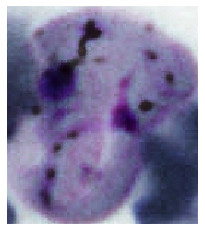

In [18]:
#cropping non_rbc cells from images based on there bounding boxes
from PIL import Image
plt.figure(figsize=(4,4))
im=Image.open("training_images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png")
im=im.crop(df_non_rbc.iloc[0,2:].values)
plt.axis("off")
plt.imshow(im)    


In [19]:
im.size

(130, 148)

In [20]:
df_non_rbc.iloc[0,1]

'trophozoite'

In [21]:
df_non_rbc.iloc[2249,:]

img_name    training_images/e640ae51-cbf1-4a84-b7cf-d38b17...
label                                              gametocyte
x_min                                                    1362
y_min                                                     516
x_max                                                    1480
y_max                                                     692
Name: 2249, dtype: object

100%|██████████████████████████████████████████████████████████████████████████████| 2252/2252 [04:34<00:00,  8.22it/s]


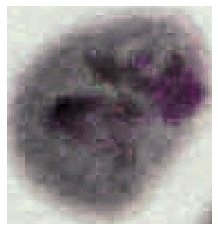

In [22]:
# Cropping non-rbc cells from images based on there bounding boxes and storing it on disk for further modelling
from tqdm import tqdm
for i in tqdm(range(2252)):
    bbox=df_non_rbc.iloc[i,2:].values
    im=Image.open(df_non_rbc.iloc[i,0])
    im=im.crop(df_non_rbc.iloc[i,2:].values)
    plt.axis("off")
    plt.imshow(im)  
    im.save('cell_images/{}_{}.png'.format(i,df_non_rbc.iloc[i,1]))

## Feature Extraction using VGG16 and Logistic Regression


In [ ]:
#Ref- https://medium.com/@skshashankkumar41/transfer-learning-8386e1a9e34a

In [17]:
import numpy as np
import os 
from keras.applications import VGG16 #importing Keras implementation of the pre-trained VGG16 network
from keras.applications import imagenet_utils #Utilities for ImageNet data preprocessing & prediction decoding
from keras.preprocessing.image import img_to_array,load_img #importing functions to load image and covert to array
from keras.layers import Input
import random
from tqdm import tqdm
from keras.models import Model
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from keras.layers.core import Dense,Dropout,Flatten
from imutils import paths #it will create a list of paths for each image 
from sklearn.preprocessing import LabelBinarizer #it will encode categories into numerical value
from sklearn.model_selection import train_test_split #library for train_test split of data 

Using TensorFlow backend.


In [18]:
df_non_rbc.label.value_counts()

trophozoite    1473
ring            353
schizont        179
gametocyte      144
leukocyte       103
Name: label, dtype: int64

In [19]:
imagePaths=list(paths.list_images("cell_images")) #it contains path for each image in our folder
print(len(imagePaths))
random.shuffle(imagePaths) #shuffling the paths of images
print(imagePaths[0]) # Output: C:/Users/SKS/Desktop/Open-CV-DL/animals\cats\cats_00001.jpg
labels = [p.split(os.path.sep)[1].split('_')[1].split('.')[0] for p in imagePaths] #it will extract the labels from the path of each image
print(imagePaths[0].split(os.path.sep)) # Output: ['C:/Users/SKS/Desktop/Open-CV-DL/animals', 'cats', 'cats_00001.jpg']
print(labels[:5])# Output: ['cats', 'cats', 'cats', 'cats', 'cats']
classNames = [str(x) for x in np.unique(labels)]

2252
cell_images\689_leukocyte.png
['cell_images', '689_leukocyte.png']
['leukocyte', 'trophozoite', 'trophozoite', 'trophozoite', 'gametocyte']


In [20]:
import collections
counter=collections.Counter(labels)
print(counter)

Counter({'trophozoite': 1473, 'ring': 353, 'schizont': 179, 'gametocyte': 144, 'leukocyte': 103})


## EDA Image Size

In [3]:
import os
from glob import glob
import numpy as np
import pandas as pd
from dask import bag, diagnostics 
from urllib import request
import cv2
import hvplot.pandas  # custom install
from matplotlib import pyplot as plt
%matplotlib inline
def get_dims(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    return h,w

# parallelize

filelist = list(paths.list_images("cell_images"))
print("total training images:",len(filelist))
dimsbag = bag.from_sequence(filelist).map(get_dims)
with diagnostics.ProgressBar():
    dims = dimsbag.compute()
    
dim_df = pd.DataFrame(dims, columns=['height', 'width'])
sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.hvplot.scatter(x='height', y='width', size='count', xlim=(0,350), ylim=(0,350), grid=True, xticks=2, 
        yticks=2, height=500, width=600).options(scaling_factor=0.1, line_alpha=1, fill_alpha=0)

total training images: 2252
[########################################] | 100% Completed | 39.6s


:Scatter   [height]   (width,count)

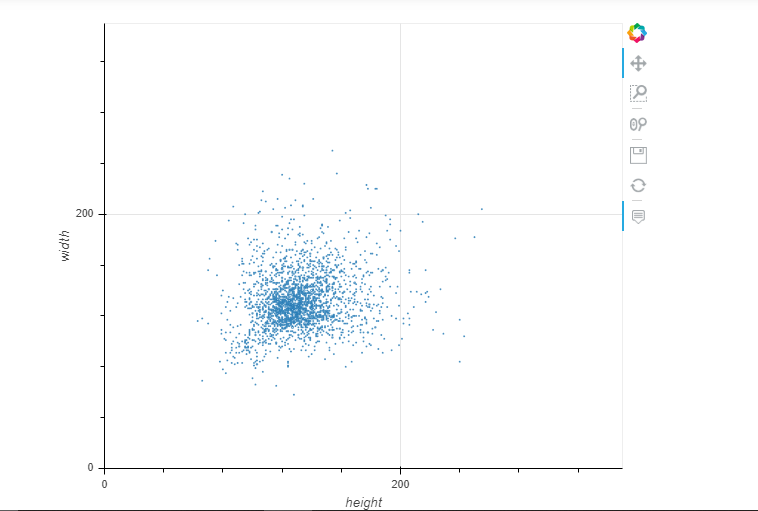

In [4]:
from IPython.display import Image
Image(filename='vgg_eda_up.png')

In [ ]:
#### As we can see that most of the image sizes lies b/w 150-150 and 200-200

## Feature Extraction using VGG16

In [21]:
model = VGG16(weights="imagenet", include_top=False)     #loading the VGG16 pre-trained on imagenet network
data=[]     #list which will have 25088 featurs for each image
for i in tqdm(imagePaths):
    image=load_img(i,target_size=(224,224))     #loading image by there paths 
    image=img_to_array(image)     #converting images into arrays 
    image = np.expand_dims(image, axis=0)     #inserting a new dimension because keras need extra dimensions 
    image = imagenet_utils.preprocess_input(image)     #preprocessing image according to imagenet data
    features=model.predict(image)     #extracting those features from the model
    data.append(features)     #appending features to the list
data=np.array(data)     #converting list into array
data=data.reshape(data.shape[0],512*7*7)

Instructions for updating:
Colocations handled automatically by placer.


100%|██████████████████████████████████████████████████████████████████████████████| 2252/2252 [04:31<00:00,  8.31it/s]


In [22]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.15,stratify=labels,random_state=0) #splitting train and test into 70:30


In [ ]:
#### Calculating Class Weights 

In [23]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
weights={}
for i in range(5):
    weights[i]=class_weights[i]

In [24]:
y_train[0]

'trophozoite'

In [25]:
weights

{0: 3.137704918032787,
 1: 4.35,
 2: 1.276,
 3: 2.518421052631579,
 4: 0.30575079872204475}

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)# convert the labels from integers to vectors
y_test=le.transform(y_test)

In [27]:
le.classes_

array(['gametocyte', 'leukocyte', 'ring', 'schizont', 'trophozoite'],
      dtype='<U11')

In [28]:
len(y_train)

1914

## Logistic Regression on Extracted Features

In [9]:
from sklearn.linear_model import LogisticRegression    #importing Logistic regression model
from sklearn.model_selection import GridSearchCV    #GridSearchCV for hyper-parameter tuning
from sklearn.metrics import classification_report    #Metrics for our classification
from sklearn.model_selection import train_test_split    


In [12]:
X_train.shape

(1914, 25088)

In [24]:
y_train.shape

(1914,)

In [58]:
params = {"C": [0.01,0.1, 1.0, 10.0, 100.0]}    #hyper-parameter tuning parameters for logistic regression
model = GridSearchCV(LogisticRegression(class_weight=weights), params, cv=3,verbose=1)
model.fit(X_train,y_train)

preds = model.predict(X_test)   #predicting classes from our model
print(classification_report(y_test, preds,target_names=le.classes_)) 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\SKS\Anaconda3\lib\site-p

              precision    recall  f1-score   support

  gametocyte       0.56      0.41      0.47        22
   leukocyte       1.00      0.80      0.89        15
        ring       0.78      0.74      0.76        53
    schizont       0.50      0.37      0.43        27
 trophozoite       0.84      0.91      0.87       221

    accuracy                           0.80       338
   macro avg       0.74      0.64      0.68       338
weighted avg       0.79      0.80      0.79       338



In [59]:
print(classification_report(y_test, preds,target_names=le.classes_)) 

              precision    recall  f1-score   support

  gametocyte       0.56      0.41      0.47        22
   leukocyte       1.00      0.80      0.89        15
        ring       0.78      0.74      0.76        53
    schizont       0.50      0.37      0.43        27
 trophozoite       0.84      0.91      0.87       221

    accuracy                           0.80       338
   macro avg       0.74      0.64      0.68       338
weighted avg       0.79      0.80      0.79       338



C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


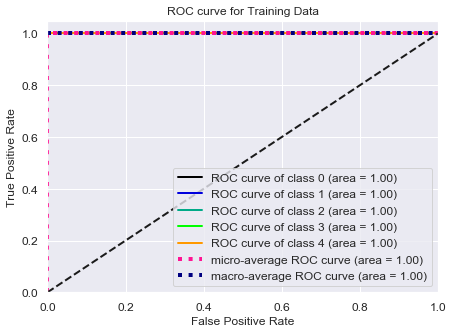

In [61]:
import scikitplot as skplt
sns.set(rc={'figure.figsize':(7,5)})
y_prob_train=model.predict_proba(X_train)
skplt.metrics.plot_roc_curve(y_train, y_prob_train)
plt.title('ROC curve for Training Data')
plt.show()

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


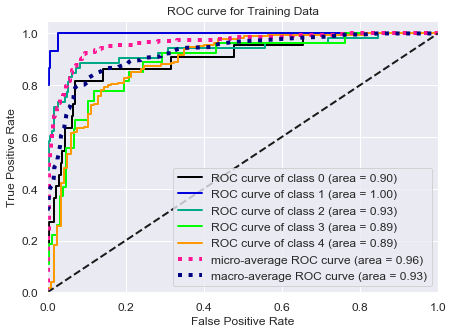

In [62]:
import scikitplot as skplt
y_prob_test=model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_prob_test)
plt.title('ROC curve for Training Data')
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix,roc_curve
import seaborn as sns
pred_train=model.predict(X_train)
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train),le.classes_,le.classes_,dtype=int)
print(df_cm)

             gametocyte  leukocyte  ring  schizont  trophozoite
gametocyte          122          0     0         0            0
leukocyte             0         88     0         0            0
ring                  0          0   300         0            0
schizont              0          0     0       152            0
trophozoite           0          0     0         0         1252


In [64]:
from sklearn.metrics import confusion_matrix,roc_curve

pred_test=model.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test),le.classes_,le.classes_,dtype=int)
print(df_cm)

             gametocyte  leukocyte  ring  schizont  trophozoite
gametocyte            9          0     0         4            9
leukocyte             0         12     1         1            1
ring                  0          0    39         0           14
schizont              2          0     0        10           15
trophozoite           5          0    10         5          201


In [65]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'model_LR.pkl') 
'''
# Load the model from the file 
knn_from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) 
'''

"\n# Load the model from the file \nknn_from_joblib = joblib.load('filename.pkl')  \n  \n# Use the loaded model to make predictions \nknn_from_joblib.predict(X_test) \n"

## Conclusions

* Feature Extraction with VGG16 and then using logistic regression is working very good
* we could increase the score by using more hyperparameter tuning 
* F1 Score is also good